In [1]:
# This is a notebook used to explore some UN Data on electronics imports over time.
# The source of the data is here: http://data.un.org/Data.aspx?d=ComTrade&f=_l1Code%3a85 It was filtered down to China, USA, Singapore,
# Korea and Japan before being downloaded
# Data was extracted on March 16, 2020
# The goal is to create a graph showing the growth in Chinese electronics exports over time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.



Setup Complete
/kaggle/input/electronics-un-data/UNdata_Export_20200316_170720823.csv


In [2]:
# Import Data
trade_data = pd.read_csv("../input/electronics-un-data/UNdata_Export_20200316_170720823.csv")
print(trade_data.head())

  Country or Area  Year                                         Commodity  \
0           China  2018         Electric motors of an output < 37.5 watts   
1           China  2018         Electric motors of an output < 37.5 watts   
2           China  2018         Electric motors of an output < 37.5 watts   
3           China  2018  Universal AC/DC motors of an output < 37.5 watts   
4           China  2018  Universal AC/DC motors of an output < 37.5 watts   

        Flow   Trade (USD)   Weight (kg)    Quantity Name      Quantity  
0     Import  1.598485e+09  4.547870e+07  Number of items  1.005370e+09  
1     Export  3.084423e+09  6.046260e+07  Number of items  2.032123e+09  
2  Re-Import  3.599630e+08  1.024135e+07  Number of items  4.437284e+08  
3     Import  5.212861e+06           NaN  Number of items  3.233570e+05  
4     Export  1.495775e+08           NaN  Number of items  2.056176e+07  


In [3]:
# Check the Countries that are here
country_list = trade_data['Country or Area'].unique()
print(country_list)
# Check the year range
year_list = trade_data['Year'].unique()
print(year_list)

['China' 'Japan' 'Rep. of Korea' 'Singapore' 'USA']
[2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005
 2004 2003 2002 2001 2000 1999 1998 1997 1996 1995 1994 1993 1992 2019
 1991 1990 1989 1988]


In [4]:
# Cleanup...
# Drop Quantity Name, Quantity
trade_data = trade_data.drop(columns=['Weight (kg)','Quantity Name','Quantity'])

# Rename 'Country or Area' to Country
trade_data = trade_data.rename(columns={"Country or Area":"Country"})

print(trade_data.head())




  Country  Year                                         Commodity       Flow  \
0   China  2018         Electric motors of an output < 37.5 watts     Import   
1   China  2018         Electric motors of an output < 37.5 watts     Export   
2   China  2018         Electric motors of an output < 37.5 watts  Re-Import   
3   China  2018  Universal AC/DC motors of an output < 37.5 watts     Import   
4   China  2018  Universal AC/DC motors of an output < 37.5 watts     Export   

    Trade (USD)  
0  1.598485e+09  
1  3.084423e+09  
2  3.599630e+08  
3  5.212861e+06  
4  1.495775e+08  


In [5]:
# Rename 'Rep. of Korea' to 'Korea'

trade_data_clean = trade_data.replace(to_replace = "Rep. of Korea", value="Korea", regex = True)
country_list2 = trade_data_clean['Country'].unique()
#print(country_list2)
#success!

print(trade_data_clean.head())


  Country  Year                                         Commodity       Flow  \
0   China  2018         Electric motors of an output < 37.5 watts     Import   
1   China  2018         Electric motors of an output < 37.5 watts     Export   
2   China  2018         Electric motors of an output < 37.5 watts  Re-Import   
3   China  2018  Universal AC/DC motors of an output < 37.5 watts     Import   
4   China  2018  Universal AC/DC motors of an output < 37.5 watts     Export   

    Trade (USD)  
0  1.598485e+09  
1  3.084423e+09  
2  3.599630e+08  
3  5.212861e+06  
4  1.495775e+08  


In [6]:
# Filter down to only Exports
export_bool = trade_data_clean['Flow']=='Export'
#print(export_bool)

trade_exports = trade_data_clean[export_bool]
print(trade_exports.head())

   Country  Year                                          Commodity    Flow  \
1    China  2018          Electric motors of an output < 37.5 watts  Export   
4    China  2018   Universal AC/DC motors of an output < 37.5 watts  Export   
7    China  2018  DC motors, DC generators, of an output < 750 w...  Export   
10   China  2018  DC motors, DC generators, of an output 0.75-75 kW  Export   
12   China  2018   DC motors, DC generators, of an output 75-375 kW  Export   

     Trade (USD)  
1   3.084423e+09  
4   1.495775e+08  
7   2.583207e+09  
10  4.428804e+08  
12  1.637172e+07  


In [7]:
# Now we want to aggregate ... Each country, each year, total of Trade (USD). Commodity doesn't really matter. 
# Drop Commodity, Drop Flow

agg_data = trade_exports.drop(columns=['Commodity','Flow'])
print(agg_data.head())


   Country  Year   Trade (USD)
1    China  2018  3.084423e+09
4    China  2018  1.495775e+08
7    China  2018  2.583207e+09
10   China  2018  4.428804e+08
12   China  2018  1.637172e+07


In [8]:
#Starting groupbys

sum_data = agg_data.groupby(['Country','Year']).sum()
print(sum_data)

               Trade (USD)
Country Year              
China   1992  8.175385e+09
        1993  9.695747e+09
        1994  1.411139e+10
        1995  1.895737e+10
        1996  2.016835e+10
...                    ...
USA     2014  1.717456e+11
        2015  1.693914e+11
        2016  1.665356e+11
        2017  1.731200e+11
        2018  1.750501e+11

[148 rows x 1 columns]


In [9]:
# Sorting this multi-index into individual frames for graphing
#['China' 'Japan' 'Rep. of Korea' 'Singapore' 'USA']
china_data = sum_data.loc['China']
china_data = china_data.rename(columns={"Trade (USD)":"China"})
#print(china_data.head())

japan_data = sum_data.loc['Japan']
japan_data = japan_data.rename(columns={"Trade (USD)":"Japan"})
#print(japan_data.head())

korea_data = sum_data.loc['Korea']
korea_data = korea_data.rename(columns={"Trade (USD)":"South Korea"})
#print(korea_data.head())

singapore_data = sum_data.loc['Singapore']
singapore_data = singapore_data.rename(columns={"Trade (USD)":"Singapore"})
#print(singapore_data.head())

usa_data = sum_data.loc['USA']
usa_data = usa_data.rename(columns={"Trade (USD)":"USA"})
#print(usa_data.head())

total_elec_data = china_data
total_elec_data = total_elec_data.join(japan_data)
total_elec_data = total_elec_data.join(korea_data)
total_elec_data = total_elec_data.join(singapore_data)
total_elec_data = total_elec_data.join(usa_data)

print(total_elec_data.head())


             China         Japan   South Korea     Singapore           USA
Year                                                                      
1992  8.175385e+09  7.477582e+10  1.787889e+10  1.661283e+10  5.416305e+10
1993  9.695747e+09  8.114570e+10  2.000789e+10  2.057651e+10  6.236828e+10
1994  1.411139e+10  9.315523e+10  2.692829e+10  3.175537e+10  7.539545e+10
1995  1.895737e+10  1.085142e+11  3.807492e+10  4.034887e+10  9.186628e+10
1996  2.016835e+10  9.518237e+10  3.508478e+10  4.060300e+10  9.731071e+10


In [10]:
total_elec_data_bil = total_elec_data / 1000000000

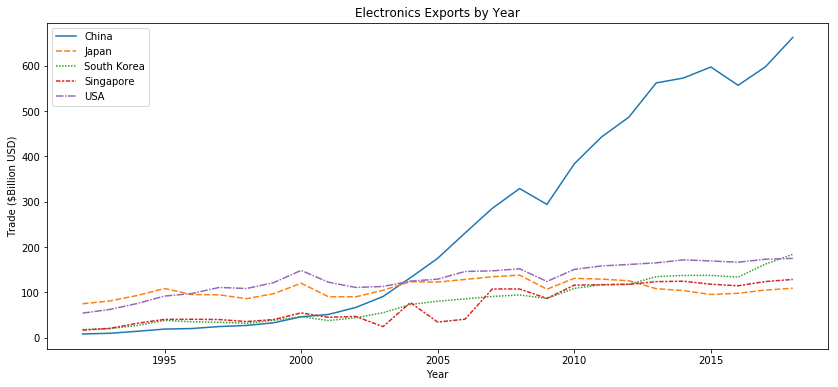

In [11]:
plt.figure(figsize=(14,6))
plt.title("Electronics Exports by Year")
plt.legend() #force the legend to appear. Label = in the graphing command is what sets the value in the legend.
plt.xlabel("Year")
plt.ylabel("Trade ($Billion USD)")
plt.ticklabel_format(style='plain', axis='y')
sns.lineplot(data=total_elec_data_bil)

#Try this next http://greg-ashton.physics.monash.edu/setting-nice-axes-labels-in-matplotlib.html
